# Derivative Pricing and valuation
## An analysis of Non-linear data distribution 
##### - Sidharth Purohit

In computational finance and risk management, several numerical methods (e.g.,
finite differences, fourier methods, and Monte Carlo simulation) are commonly used
for the valuation of financial derivatives.

**The Black-Scholes** formula is probably one of the most widely cited and used models
in derivative pricing. Numerous variations and extensions of this formula are used to
price many kinds of financial derivatives. However, the model is based on several
assumptions. It assumes a specific form of movement for the derivative price, namely
a **Geometric Brownian Motion (GBM)**. It also assumes a conditional payment at
maturity of the option and economic constraints, such as no-arbitrage. Several other
derivative pricing models have similarly impractical model assumptions

Another aspect of the many traditional derivative pricing models is **model calibration**, which is typically done not by historical asset prices but by means of derivative
prices (i.e., by matching the market prices of heavily traded options to the derivative
prices from the mathematical model). In the process of model calibration, thousands
of derivative prices need to be determined in order to fit the parameters of the model,
and the overall process is time consuming. Efficient numerical computation is
increasingly important in financial risk management, especially when we deal with
real-time risk management (e.g., high frequency trading). However, due to the
requirement of a highly efficient computation, certain high-quality asset models and
methodologies are discarded during model calibration of traditional derivative pricing models.


Machine learning can potentially be used to tackle these drawbacks related to imprac‐
tical model assumptions and inefficient model calibration. Machine learning algo‐
rithms have the ability to tackle more nuances with very few theoretical assumptions
and can be effectively used for derivative pricing, even in a world with frictions. With
the advancements in hardware, we can train machine learning models on high per‐
formance CPUs, GPUs, and other specialized hardware to achieve a speed increase of
several orders of magnitude as compared to the traditional derivative pricing models.
Additionally, market data is plentiful, so it is possible to train a machine learning
algorithm to learn the function that is collectively generating derivative prices in the
market. Machine learning models can capture subtle nonlinearities in the data that
are not obtainable through other statistical approaches.

In this dossier, we look at **derivative pricing from a machine learning** standpoint
and use a supervised regression–based model to price an option from simulated data.

**The main idea here is to come up with a machine learning framework for derivative
pricing. Achieving a machine learning model with high accuracy would mean that we can leverage the efficient numerical calculation of machine learning for derivative
pricing with fewer underlying model assumptions.**


## Problem Statement 



In the supervised regression framework used for this case study, the derivative pricing problem is defined in the regression framework, where the predicted variable is the pricing of the option, and the predictor variables are the market data that are used as inputs to the Black-Scholes option pricing model

Options have been used in finance as means to hedge risk in a nonlinear manner. They are are also used by speculators in order to take leveraged bets in the financial markets. Historically, people have used the Black Scholes formula.


#### The Black Scholes formula


$$ Se^{-q \tau}\Phi(d_1) - e^{-r \tau} K\Phi(d_2) \, $$

With
$$ d_1 = \frac{\ln(S/K) + (r - q + \sigma^2/2)\tau}{\sigma\sqrt{\tau}} $$

and
$$ d_2 = \frac{\ln(S/K) + (r - q - \sigma^2/2)\tau}{\sigma\sqrt{\tau}} = d_1 - \sigma\sqrt{\tau} $$

Where we have; Stock price $S$; Strike price $K$; Risk-free rate $r$; Annual dividend yield $q$; Time to maturity $\tau = T-t$ (represented as a unit-less fraction of one year); Volatility $\sigma$

In order to make the logic simpler, we define Moneyness as $M = K/S$ and look at the prices in terms of per unit of current stock price. We also set $q$ as $0$

This simplifes the formula down to the following
$$ e^{-q \tau}\Phi\left( \frac{- \ln(M) + (r+ \sigma^2/2 )\tau}{\sigma\sqrt{\tau}}\right) - e^{-r \tau} M\Phi\left( \frac{- \ln(M) + (r - \sigma^2/2)\tau}{\sigma\sqrt{\tau}} \right) \, $$


Now as we consider here q=0, Therefore 




$$ \Phi\left( \frac{- \ln(M) + (r+ \sigma^2/2 )\tau}{\sigma\sqrt{\tau}}\right) - e^{-r \tau} M\Phi\left( \frac{- \ln(M) + (r - \sigma^2/2)\tau}{\sigma\sqrt{\tau}} \right) \, $$


where Cummulative Normal Distribution for the expression is defined as :

$$ N_D1 = \Phi\left( \frac{- \ln(M) + (r+ \sigma^2/2 )\tau}{\sigma\sqrt{\tau}}\right) $$

and 

$$ N_D2 = \Phi\left( \frac{- \ln(M) + (r- \sigma^2/2 )\tau}{\sigma\sqrt{\tau}}\right) $$




#### Volatility or Vol Suface

In the options market, there isn't a single value of volatility which gives us the correct price. We often find the volatility such that the output matches the price
Simulation

Here, we assume the the sturcture of the vol surface and generate the data. In practice, we would source the data from a data vendor.

We use the following function to generate the option volatility surface :
$$ \sigma(M, \tau) = \sigma_0 + \alpha\tau + \beta (M - 1)^2$$


### 2.  Loading the data and python packages

In [1]:
# Distribution functions
from scipy.stats import norm


# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


##### True Parameters
The constant parameters required
for the volatility surface are defined below. These parameters are not expected to have
a significant impact on the option price; therefore, these parameters are set to some
meaningful values:

true_alpha = 0.1

true_beta = 0.1

true_sigma0 = 0.2
 
 
##### Risk free rate -
An input to the Black-Scholes option pricing model,

In [25]:
true_alpha = 0.1
true_beta = 0.1
true_sigma0 = 0.2

risk_free_rate = 0.05

#### Volume and Option Pricing functions :

In [26]:
def option_vol_from_surface(moneyness, time_to_maturity):
    return true_sigma0 + true_alpha * time_to_maturity + true_beta * np.square(moneyness - 1)

def call_option_price(moneyness, time_to_maturity, option_vol):
    d1=(np.log(1/moneyness)+(risk_free_rate+np.square(option_vol))*time_to_maturity)/(option_vol*np.sqrt(time_to_maturity))
    d2=(np.log(1/moneyness)+(risk_free_rate-np.square(option_vol))*time_to_maturity)/(option_vol*np.sqrt(time_to_maturity))
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    return N_d1 - moneyness * np.exp(-risk_free_rate*time_to_maturity) * N_d2


### 3. Data Generation


• **Time to maturity (Ts)** is generated using the np.random.random function, which
generates a uniform random variable between zero and one.

• **Moneyness (Ks)** is generated using the np.random.randn function, which generates 
a normally distributed random variable. The random number multiplied by
0.25 generates the deviation of strike from spot price and the overall equation
ensures that the moneyness is greater than zero.

• **Volatility (sigma)** is generated as a function of time to maturity and moneyness equation.

• **The option price(Ps)** is generated using equation for **the Black-Scholes option price.**

In [27]:
N = 10000 #total data points

Ks = 1 + 0.25*np.random.randn(N)
Ts = np.random.random(N)
Sigmas = np.array([option_vol_from_surface(k,t) for k,t in zip(Ks,Ts)])
Ps = np.array([call_option_price(k,t,sig) for k,t,sig in zip(Ks,Ts,Sigmas)])

In [28]:
#The Endogenous(Endog) and Exogenous(Exog) data points are set here. Or the predictor and predicted variables.

Y = Ps

X = np.concatenate([Ks.reshape(-1,1), Ts.reshape(-1,1), Sigmas.reshape(-1,1)], axis=1)

dataset = pd.DataFrame(np.concatenate([Y.reshape(-1,1), X], axis=1),
                       columns=['Price', 'Moneyness', 'Time', 'Vol'])

### 4. Data analysis

In [29]:
dataset.head()

,Price,Moneyness,Time,Vol
0,0.612,0.390,0.129,0.250
1,0.504,0.519,0.800,0.303
2,0.147,0.908,0.286,0.229
3,0.435,0.606,0.871,0.303
4,0.334,0.699,0.584,0.268


In [30]:
pd.set_option('precision', 3)
dataset.describe()

,Price,Moneyness,Time,Vol
count,10000.000,10000.000,1.000e+04,10000.000
mean,0.175,1.005,4.995e-01,0.256
std,0.132,0.248,2.893e-01,0.030
min,0.000,0.142,1.030e-04,0.200
25%,0.072,0.838,2.497e-01,0.231
50%,0.158,1.004,5.009e-01,0.257
75%,0.248,1.171,7.490e-01,0.281
max,0.859,1.976,9.998e-01,0.386


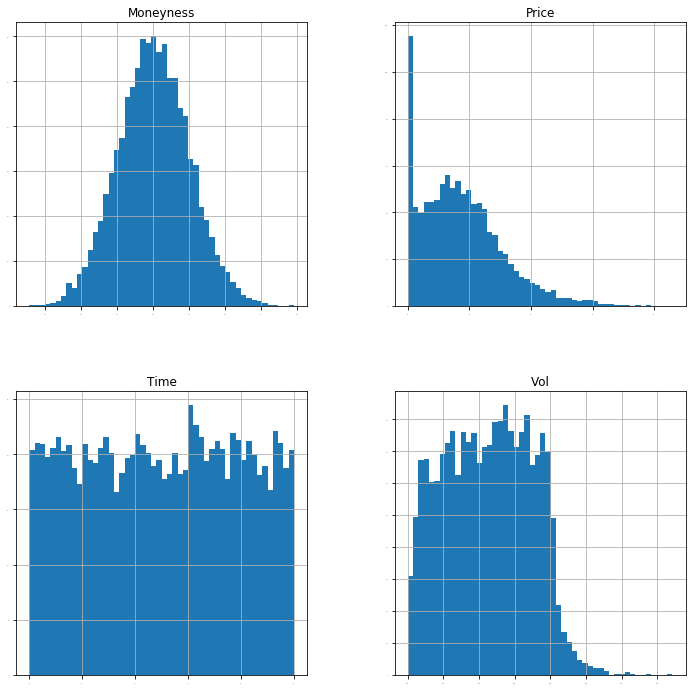

In [31]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

We can see that the price has an interesting distribution with a spike at 0

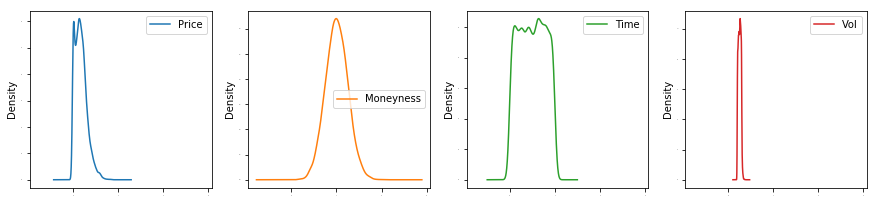

In [32]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Next we look at the interaction between different variables

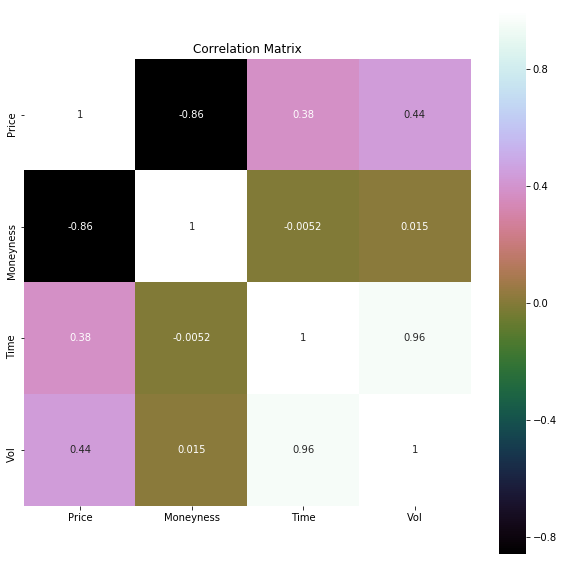

In [33]:
correlation = dataset.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

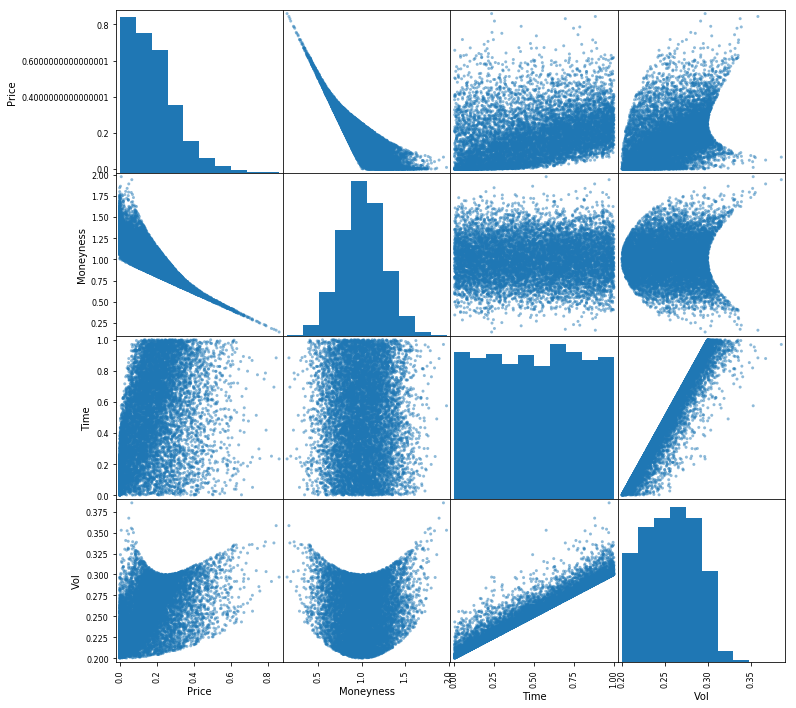

In [34]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()



We see some very interesting non linear analysis. This means that we expect our non linear models to do a better job than our linear models.


### 4. Data Preparation and Analysis

#### 4.1. Univariate Feature Selection
We use SelectKBest function from sklearn

In [35]:
bestfeatures = SelectKBest(k='all', score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['Moneyness', 'Time', 'Vol'])
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
Moneyness,28525.709
Vol,2373.569
Time,1707.990


We observe that the moneyness is the most important variable for the price.

### 5. Evaluate Algorithms and Models

#### 5.1. Train Test Split and Evaluation Metrics

In [36]:

validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

We use the prebuilt scikit models to run a K fold analysis on our training data. We then train the model on the full training data and use it for prediction of the test data. The parameters for the K fold analysis are defined as -

In [37]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'

#### 5.2. Compare Models and Algorithms
#### Linear Models and Regression Trees

In [38]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

#### Neural Network Predictor

In [39]:
models.append(('MLP', MLPRegressor()))

#### Boosting and Bagging Methods


In [40]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [41]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.000359 (0.000033) 0.000357 0.000342
LASSO: 0.017584 (0.001506) 0.017578 0.016724
EN: 0.017584 (0.001506) 0.017578 0.016724
KNN: 0.000017 (0.000009) 0.000009 0.000013
CART: 0.000010 (0.000001) 0.000000 0.000009
SVR: 0.003497 (0.000200) 0.003441 0.003399
MLP: 0.000048 (0.000033) 0.000009 0.000007
ABR: 0.000622 (0.000024) 0.000630 0.000616
GBR: 0.000021 (0.000003) 0.000017 0.000018
RFR: 0.000004 (0.000001) 0.000001 0.000003
ETR: 0.000002 (0.000001) 0.000000 0.000002


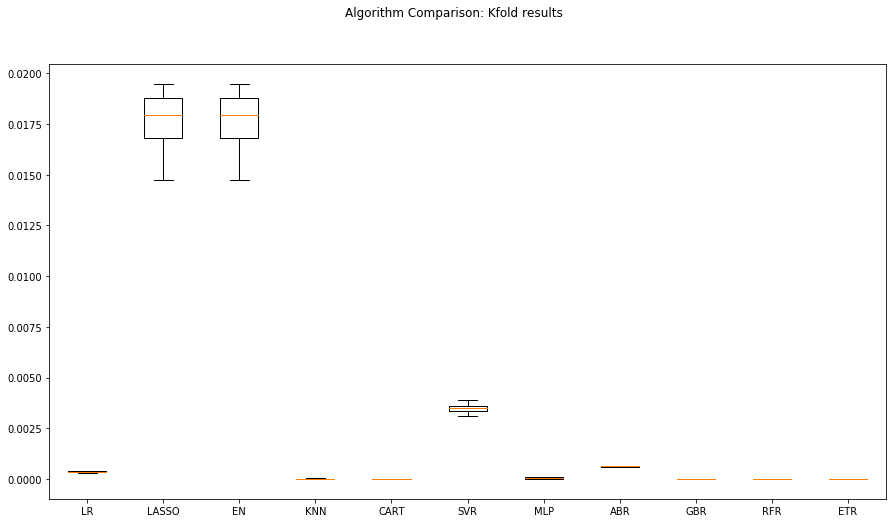

In [42]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

In order to get a more realistic view we remove Lasso regression and Elastic Net models.

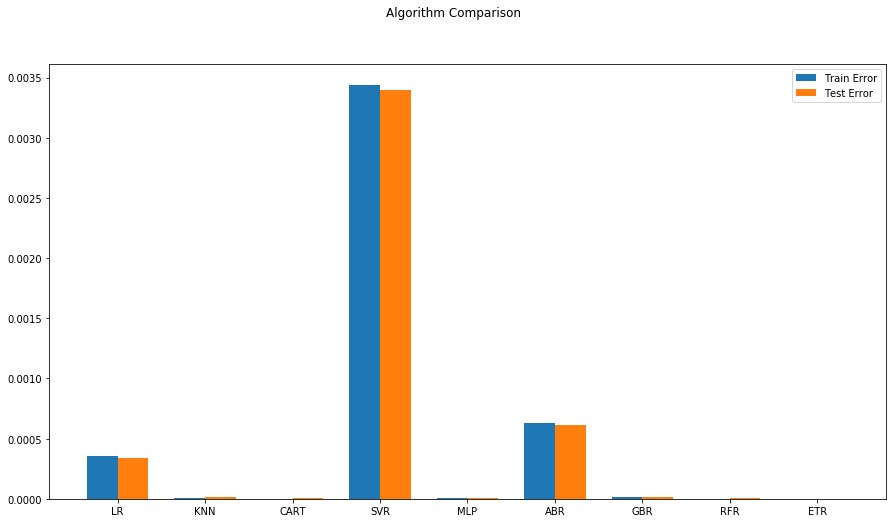

In [43]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names)-2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results[0:1] + train_results[3:],  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results[0:1] + test_results[3:], width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names[0:1] + names[3:])
pyplot.show()

We see that the multilayer perceptron (MLP) algorithm does a lot better that the linear algorithm. However, the CART and the Forest methods do a very good job as well. Given MLP is one of the best models we perform the grid search for MLP model in the next step.

### 6. Model Tuning and finalising the model

As shown in the chart above the MLP model is one of the best model, so we perform the model tuning. We perform a grid search with different combination of hidden layers in the MLP model.



In [44]:
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000026 using {'hidden_layer_sizes': (20, 30, 20)}
-0.000465 (0.000622) with: {'hidden_layer_sizes': (20,)}
-0.000276 (0.000378) with: {'hidden_layer_sizes': (50,)}
-0.000272 (0.000490) with: {'hidden_layer_sizes': (20, 20)}
-0.000026 (0.000014) with: {'hidden_layer_sizes': (20, 30, 20)}


The best model is the model with 3 layers with 20, 30 and 20 nodes in each layer respectively.

In [45]:
# prepare model
model_tuned = MLPRegressor(hidden_layer_sizes=(20, 30, 20))
model_tuned.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 30, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [46]:
# estimate accuracy on validation set
# transform the validation dataset
predictions = model_tuned.predict(X_test)
print(mean_squared_error(Y_test, predictions))

2.164410681638658e-05


Voila!

We see that the mean error (RMSE) is 2.16e-5 , which is less than a cent. Hence, the deep learning model does an excellent job of fitting the Black-Scholes option pricing model. The accuracy may be enhanced with more tuning.


### 7. Additonal analysis: removing the volatilty introduced data

Next, we make the process harder by trying to predict the price without the volatility data.


In [47]:
X = X[:, :2]



validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]


In [48]:

num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'


models = []
models.append(('LR', LinearRegression()))
#models.append(('LASSO', Lasso()))
#models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


#MLP 
models.append(('MLP', MLPRegressor()))


# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))



In [49]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.002068 (0.000254) 0.002063 0.001935
KNN: 0.000017 (0.000009) 0.000009 0.000013
CART: 0.000010 (0.000001) 0.000000 0.000009
SVR: 0.003935 (0.000078) 0.003880 0.003865
MLP: 0.000063 (0.000056) 0.000008 0.000007
ABR: 0.000608 (0.000022) 0.000574 0.000553
GBR: 0.000023 (0.000003) 0.000017 0.000018
RFR: 0.000004 (0.000001) 0.000001 0.000003
ETR: 0.000002 (0.000002) 0.000000 0.000001


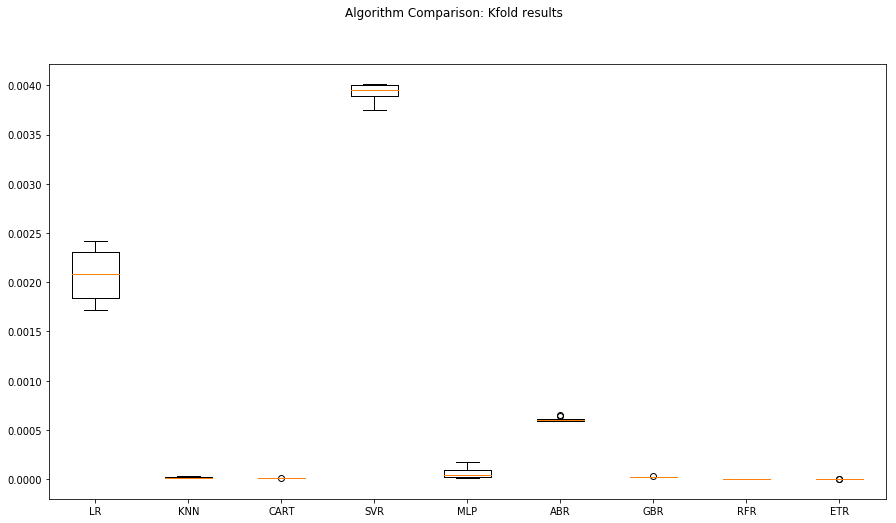

In [50]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

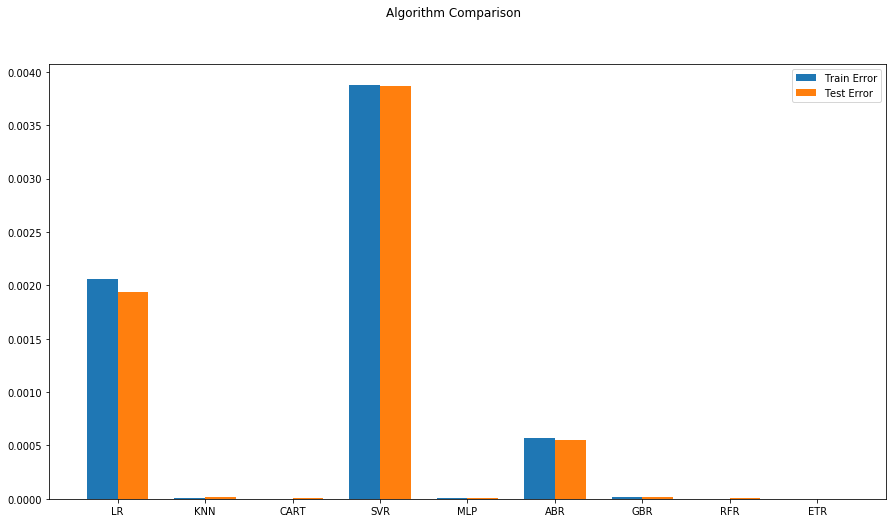

In [51]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

We can see that the linear regression now does a worse job than before, this is expected since we have added a greater amount of non linearity.


### Summary

1. The linear regression model did not do as well as our non-linear models and the non-linear models have a very good performance overall.

2. Artificial neural network (ANN) can reproduce the Black and Scholes option pricing formula for a call option to a high degree of accuracy which means that we can leverage the efficient numerical calculation of machine learning in the derivative pricing without relying on the impractical assumptions made in the traditional derivative pricing models.

3.  New technology has commoditized the use of ANN, so it might be worthwhile for banks, hedge funds, and financial institutions to explore these models for derivative pricing.

##### - Sidharth Purohit
